In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("S02_21.08.20_14.34.32.csv")

In [3]:
k = df["MarkerValueInt"].fillna("nan")
l = df["EEG.AF3"]

In [4]:
start = 0
last = 0
c = []
l1 = []
l3 = []
l22 = []
l23 = []
for i in range (0,len(k)):
    last = i
    if type(k[i]) == float:
        k[i]
        str(start) +" "+ str(last)
        t = list(l[start:last])
        if k[i] == 1.0:
            l1.append(t)
        if k[i] == 3.0:
            l3.append(t)
        if k[i] == 22.0:
            l22.append(t)
        if k[i] == 23.0:
            l23.append(t)
            
        start = last
        

In [5]:
class_22 = pd.DataFrame(l22)
df1 = class_22.T




In [6]:
class_23 = pd.DataFrame(l23)
df2 = class_23.T



In [7]:
class_23.columns

RangeIndex(start=0, stop=1210, step=1)

In [8]:
df1.columns

RangeIndex(start=0, stop=44, step=1)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import variation
from scipy.stats import iqr
from scipy.stats import entropy
from scipy.stats import power_divergence
from scipy import stats
from scipy.stats import moment

In [11]:
feature = []
for i in df1.columns:
    col =  df1[i].dropna()                                                                                                                 
    Peak_height = max(col) - min(col)
    sensor_response = max(col)
    peak_time = col.idxmax() - col.idxmin()
    area= np.trapz(col,x=(col.index))
    Kurtosis = kurtosis(col)
    Skew = skew(col)
    Variation = variation(col)
    IQR = iqr(col)
    Entropy= entropy(col)
    Power_divergance =power_divergence(col, lambda_='log-likelihood')
    Power_divergance = Power_divergance.statistic
    Jarque_bera = stats.jarque_bera(col)
    Jarque_bera = Jarque_bera[0]
    Moment = moment(col, moment=3)
    Mean = col.mean()
    Std = col.std()
    feature.append([Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera])
    

In [12]:
df_22 = pd.DataFrame(feature,columns=['Mean','Std','sensor_response','Peak_height','peak_time','area','Kurtosis','Skew','Moment','Variation','IQR','Entropy','Power_divergance','Jarque_bera'])

In [13]:
df_22

,Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera
0,4191.729617,48.818336,4447.692383,396.410401,1256,6.023451e+06,10.439495,1.975388,2.295875e+05,0.011642,22.564453,7.270941,810.992462,7465.118751
1,4181.793943,83.693183,4418.461426,334.871582,244,1.162367e+06,1.566518,1.540650,8.983286e+05,0.019978,54.872071,5.631014,461.012995,138.900075
2,4189.502482,36.085091,4375.897461,234.358887,664,3.154583e+06,13.674273,3.582226,1.679855e+05,0.008608,14.358886,6.625356,231.680557,7487.066272
3,4196.516444,100.780543,4387.179688,382.564209,-225,1.779201e+06,-1.021009,-0.106729,-1.088619e+05,0.023987,161.538574,6.051801,1027.267326,19.267094
4,4175.120756,84.425315,4424.615234,410.256347,300,1.578029e+06,0.632578,0.413195,2.476581e+05,0.020194,104.615478,5.937333,643.671359,17.103584
5,4194.676125,131.341519,4611.282227,558.974610,-72,1.270786e+06,0.373617,1.161554,2.618781e+06,0.031260,215.128540,5.716545,1231.662666,70.128036
6,4220.260856,63.631093,4406.666504,249.230469,92,9.705413e+05,2.531388,1.859836,4.760545e+05,0.015045,36.153809,5.442306,218.648738,194.847448
7,4186.815027,59.812743,4441.538574,380.000000,812,3.671617e+06,6.309401,1.936215,4.136114e+05,0.014278,23.974365,6.777546,742.707125,2004.922602
8,4185.183198,92.814669,4435.384766,365.641114,263,1.380895e+06,1.054458,1.387538,1.104393e+06,0.022143,63.333496,5.801876,672.517005,121.544937
9,4200.545844,45.204513,4420.000000,273.333496,168,1.659090e+06,11.790061,3.339019,3.072679e+05,0.010748,26.794678,5.981357,189.910988,3029.428717


In [14]:
df_22['Target'] = 0

In [15]:
df_22

,Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera,Target
0,4191.729617,48.818336,4447.692383,396.410401,1256,6.023451e+06,10.439495,1.975388,2.295875e+05,0.011642,22.564453,7.270941,810.992462,7465.118751,0
1,4181.793943,83.693183,4418.461426,334.871582,244,1.162367e+06,1.566518,1.540650,8.983286e+05,0.019978,54.872071,5.631014,461.012995,138.900075,0
2,4189.502482,36.085091,4375.897461,234.358887,664,3.154583e+06,13.674273,3.582226,1.679855e+05,0.008608,14.358886,6.625356,231.680557,7487.066272,0
3,4196.516444,100.780543,4387.179688,382.564209,-225,1.779201e+06,-1.021009,-0.106729,-1.088619e+05,0.023987,161.538574,6.051801,1027.267326,19.267094,0
4,4175.120756,84.425315,4424.615234,410.256347,300,1.578029e+06,0.632578,0.413195,2.476581e+05,0.020194,104.615478,5.937333,643.671359,17.103584,0
5,4194.676125,131.341519,4611.282227,558.974610,-72,1.270786e+06,0.373617,1.161554,2.618781e+06,0.031260,215.128540,5.716545,1231.662666,70.128036,0
6,4220.260856,63.631093,4406.666504,249.230469,92,9.705413e+05,2.531388,1.859836,4.760545e+05,0.015045,36.153809,5.442306,218.648738,194.847448,0
7,4186.815027,59.812743,4441.538574,380.000000,812,3.671617e+06,6.309401,1.936215,4.136114e+05,0.014278,23.974365,6.777546,742.707125,2004.922602,0
8,4185.183198,92.814669,4435.384766,365.641114,263,1.380895e+06,1.054458,1.387538,1.104393e+06,0.022143,63.333496,5.801876,672.517005,121.544937,0
9,4200.545844,45.204513,4420.000000,273.333496,168,1.659090e+06,11.790061,3.339019,3.072679e+05,0.010748,26.794678,5.981357,189.910988,3029.428717,0


In [16]:
feature = []
for i in df2.columns:
    col =  df1[i].dropna()                                                                                                                 
    Peak_height = max(col) - min(col)
    sensor_response = max(col)
    peak_time = col.idxmax() - col.idxmin()
    area= np.trapz(col,x=(col.index))
    Kurtosis = kurtosis(col)
    Skew = skew(col)
    Variation = variation(col)
    IQR = iqr(col)
    Entropy= entropy(col)
    Power_divergance =power_divergence(col, lambda_='log-likelihood')
    Power_divergance = Power_divergance.statistic
    Jarque_bera = stats.jarque_bera(col)
    Jarque_bera = Jarque_bera[0]
    Moment = moment(col, moment=3)
    Mean = col.mean()
    Std = col.std()
    feature.append([Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera])
    

In [17]:
df_23 = pd.DataFrame(feature,columns=['Mean','Std','sensor_response','Peak_height','peak_time','area','Kurtosis','Skew','Moment','Variation','IQR','Entropy','Power_divergance','Jarque_bera'])

In [18]:
df_23

,Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera
0,4191.729617,48.818336,4447.692383,396.410401,1256,6.023451e+06,10.439495,1.975388,2.295875e+05,0.011642,22.564453,7.270941,810.992462,7465.118751
1,4181.793943,83.693183,4418.461426,334.871582,244,1.162367e+06,1.566518,1.540650,8.983286e+05,0.019978,54.872071,5.631014,461.012995,138.900075
2,4189.502482,36.085091,4375.897461,234.358887,664,3.154583e+06,13.674273,3.582226,1.679855e+05,0.008608,14.358886,6.625356,231.680557,7487.066272
3,4196.516444,100.780543,4387.179688,382.564209,-225,1.779201e+06,-1.021009,-0.106729,-1.088619e+05,0.023987,161.538574,6.051801,1027.267326,19.267094
4,4175.120756,84.425315,4424.615234,410.256347,300,1.578029e+06,0.632578,0.413195,2.476581e+05,0.020194,104.615478,5.937333,643.671359,17.103584
5,4194.676125,131.341519,4611.282227,558.974610,-72,1.270786e+06,0.373617,1.161554,2.618781e+06,0.031260,215.128540,5.716545,1231.662666,70.128036
6,4220.260856,63.631093,4406.666504,249.230469,92,9.705413e+05,2.531388,1.859836,4.760545e+05,0.015045,36.153809,5.442306,218.648738,194.847448
7,4186.815027,59.812743,4441.538574,380.000000,812,3.671617e+06,6.309401,1.936215,4.136114e+05,0.014278,23.974365,6.777546,742.707125,2004.922602
8,4185.183198,92.814669,4435.384766,365.641114,263,1.380895e+06,1.054458,1.387538,1.104393e+06,0.022143,63.333496,5.801876,672.517005,121.544937
9,4200.545844,45.204513,4420.000000,273.333496,168,1.659090e+06,11.790061,3.339019,3.072679e+05,0.010748,26.794678,5.981357,189.910988,3029.428717


In [19]:
df_23['Target'] = 1

In [20]:
df_23

,Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera,Target
0,4191.729617,48.818336,4447.692383,396.410401,1256,6.023451e+06,10.439495,1.975388,2.295875e+05,0.011642,22.564453,7.270941,810.992462,7465.118751,1
1,4181.793943,83.693183,4418.461426,334.871582,244,1.162367e+06,1.566518,1.540650,8.983286e+05,0.019978,54.872071,5.631014,461.012995,138.900075,1
2,4189.502482,36.085091,4375.897461,234.358887,664,3.154583e+06,13.674273,3.582226,1.679855e+05,0.008608,14.358886,6.625356,231.680557,7487.066272,1
3,4196.516444,100.780543,4387.179688,382.564209,-225,1.779201e+06,-1.021009,-0.106729,-1.088619e+05,0.023987,161.538574,6.051801,1027.267326,19.267094,1
4,4175.120756,84.425315,4424.615234,410.256347,300,1.578029e+06,0.632578,0.413195,2.476581e+05,0.020194,104.615478,5.937333,643.671359,17.103584,1
5,4194.676125,131.341519,4611.282227,558.974610,-72,1.270786e+06,0.373617,1.161554,2.618781e+06,0.031260,215.128540,5.716545,1231.662666,70.128036,1
6,4220.260856,63.631093,4406.666504,249.230469,92,9.705413e+05,2.531388,1.859836,4.760545e+05,0.015045,36.153809,5.442306,218.648738,194.847448,1
7,4186.815027,59.812743,4441.538574,380.000000,812,3.671617e+06,6.309401,1.936215,4.136114e+05,0.014278,23.974365,6.777546,742.707125,2004.922602,1
8,4185.183198,92.814669,4435.384766,365.641114,263,1.380895e+06,1.054458,1.387538,1.104393e+06,0.022143,63.333496,5.801876,672.517005,121.544937,1
9,4200.545844,45.204513,4420.000000,273.333496,168,1.659090e+06,11.790061,3.339019,3.072679e+05,0.010748,26.794678,5.981357,189.910988,3029.428717,1


In [21]:
df_final = pd.concat([df_22,df_23])

In [22]:
df_final.head(10)

,Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera,Target
0,4191.729617,48.818336,4447.692383,396.410401,1256,6.023451e+06,10.439495,1.975388,2.295875e+05,0.011642,22.564453,7.270941,810.992462,7465.118751,0
1,4181.793943,83.693183,4418.461426,334.871582,244,1.162367e+06,1.566518,1.540650,8.983286e+05,0.019978,54.872071,5.631014,461.012995,138.900075,0
2,4189.502482,36.085091,4375.897461,234.358887,664,3.154583e+06,13.674273,3.582226,1.679855e+05,0.008608,14.358886,6.625356,231.680557,7487.066272,0
3,4196.516444,100.780543,4387.179688,382.564209,-225,1.779201e+06,-1.021009,-0.106729,-1.088619e+05,0.023987,161.538574,6.051801,1027.267326,19.267094,0
4,4175.120756,84.425315,4424.615234,410.256347,300,1.578029e+06,0.632578,0.413195,2.476581e+05,0.020194,104.615478,5.937333,643.671359,17.103584,0
5,4194.676125,131.341519,4611.282227,558.974610,-72,1.270786e+06,0.373617,1.161554,2.618781e+06,0.031260,215.128540,5.716545,1231.662666,70.128036,0
6,4220.260856,63.631093,4406.666504,249.230469,92,9.705413e+05,2.531388,1.859836,4.760545e+05,0.015045,36.153809,5.442306,218.648738,194.847448,0
7,4186.815027,59.812743,4441.538574,380.000000,812,3.671617e+06,6.309401,1.936215,4.136114e+05,0.014278,23.974365,6.777546,742.707125,2004.922602,0
8,4185.183198,92.814669,4435.384766,365.641114,263,1.380895e+06,1.054458,1.387538,1.104393e+06,0.022143,63.333496,5.801876,672.517005,121.544937,0
9,4200.545844,45.204513,4420.000000,273.333496,168,1.659090e+06,11.790061,3.339019,3.072679e+05,0.010748,26.794678,5.981357,189.910988,3029.428717,0


In [23]:
df_final.tail()

,Mean,Std,sensor_response,Peak_height,peak_time,area,Kurtosis,Skew,Moment,Variation,IQR,Entropy,Power_divergance,Jarque_bera,Target
33,4193.557202,78.577396,4456.410156,389.743408,-41,1.647840e+06,2.892461,1.775281,8.580342e+05,0.018714,34.743408,5.976178,572.421181,344.303847,1
34,4179.832009,82.304596,4421.538574,368.718017,418,2.056269e+06,2.154244,1.668171,9.272355e+05,0.019671,32.820801,6.200318,788.896137,323.981966,1
35,4191.456992,50.847743,4482.051270,338.461426,516,2.238089e+06,20.592840,4.454831,5.840198e+05,0.012120,15.897460,6.282195,323.651845,11222.676364,1
36,4195.543743,76.722422,4644.102539,542.051269,645,2.848638e+06,15.538514,3.673325,1.655265e+06,0.018273,44.743409,6.521929,932.252338,8370.195362,1
37,4153.650975,120.511388,4626.153809,631.281983,-59,1.665230e+06,2.789215,1.808242,3.152960e+06,0.028977,91.281738,5.996039,1378.668266,349.382997,1


In [24]:
df_final.Target.value_counts()

0    44
1    38
Name: Target, dtype: int64

In [25]:
x= df_final.corr()['Target']
x= abs(x)

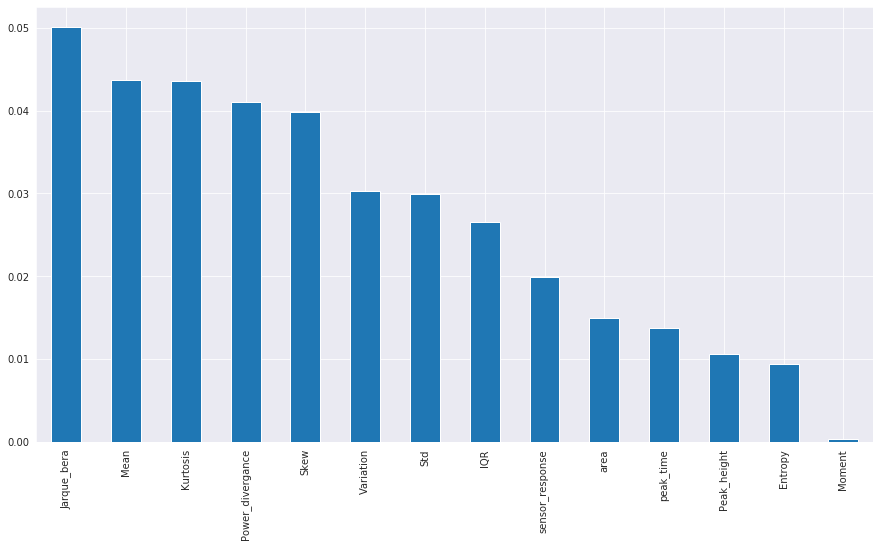

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
x[:-1].sort_values(ascending=False).plot.bar()

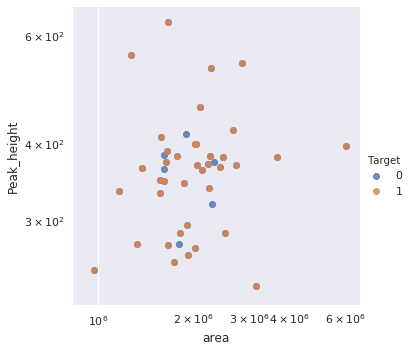

In [27]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df_final, x='area', y='Peak_height', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set(xscale="log", yscale="log")

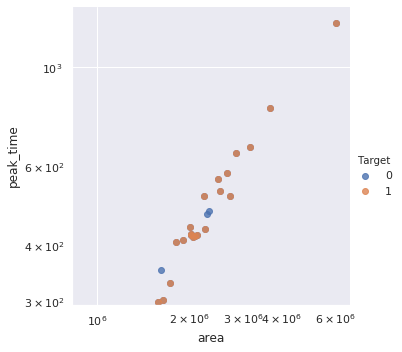

In [28]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df_final, x='area', y='peak_time', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set(xscale="log", yscale="log")

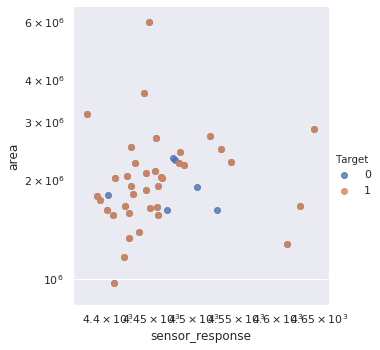

In [29]:
sns.set(color_codes=True)
grid =sns.lmplot(data=df_final, x='sensor_response', y='area', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set(xscale="log", yscale="log")

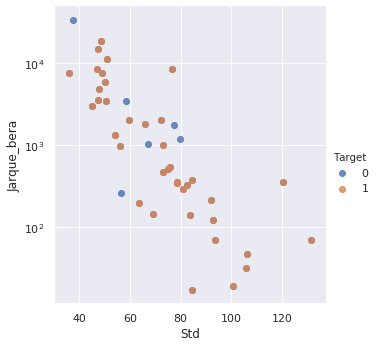

In [30]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df_final, x='Std', y='Jarque_bera', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set( yscale="log")

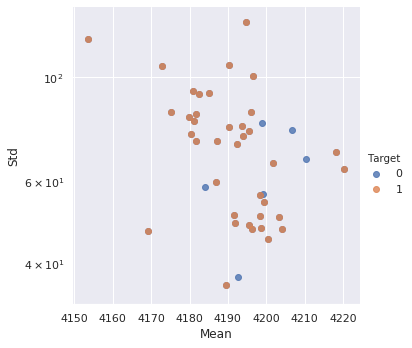

In [31]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df_final, x='Mean', y='Std', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set( yscale="log")

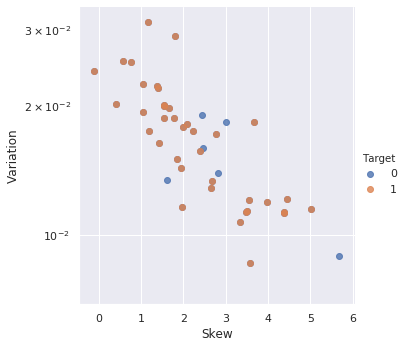

In [32]:
sns.set(color_codes=True)
grid = sns.lmplot(data=df_final, x='Skew', y='Variation', hue='Target',
                   fit_reg=False, legend=True, legend_out=True)
grid.set( yscale="log")

In [33]:
from mpl_toolkits import mplot3d
%matplotlib inline

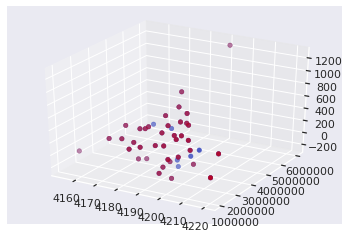

In [34]:
ax=plt.axes(projection='3d')
ax.scatter(df_final['Mean'],df_final['area'],df_final['peak_time'],c=df_final.Target,cmap='coolwarm',linewidth=0.5)

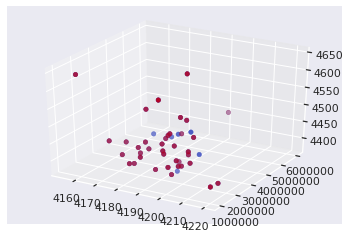

In [35]:
ax=plt.axes(projection='3d')
ax.scatter(df_final['Mean'],df_final['area'],df_final['sensor_response'],c=df_final.Target,cmap='coolwarm',linewidth=0.5)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df_final.drop('Target',axis=1)
y = df_final.Target

In [38]:
c= df_final.columns

Feature ranking:
1. Jarque_bera (0.107114)
2. Moment (0.091104)
3. Kurtosis (0.090665)
4. sensor_response (0.084167)
5. Mean (0.082759)
6. Skew (0.077458)
7. Variation (0.073748)
8. Std (0.071536)
9. IQR (0.069651)
10. Peak_height (0.066108)
11. Power_divergance (0.050566)
12. area (0.047646)
13. peak_time (0.044291)
14. Entropy (0.043188)


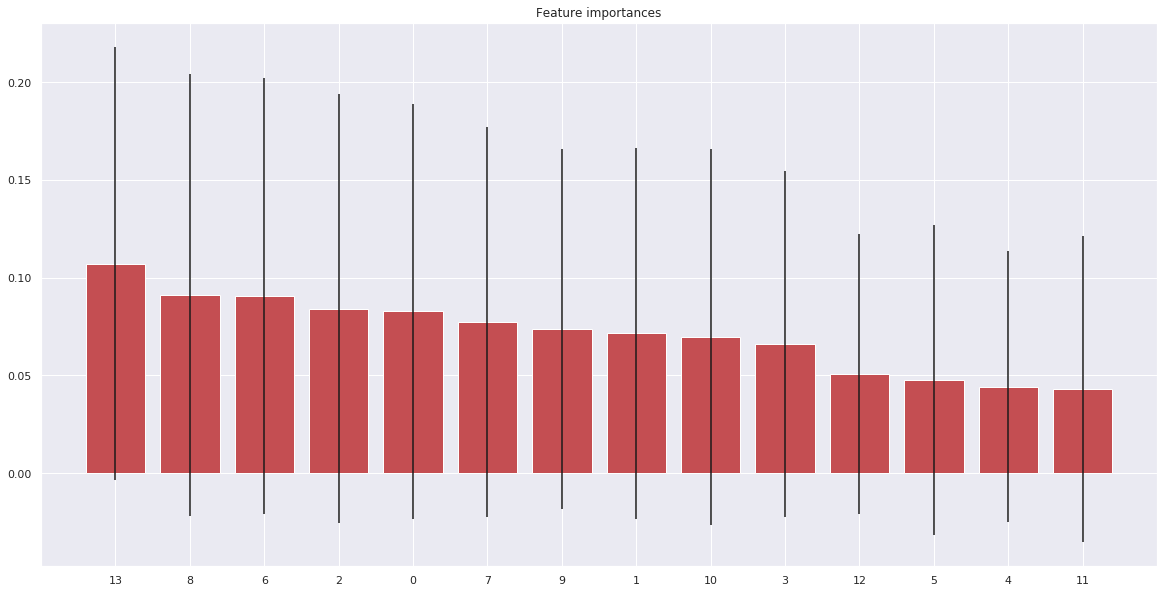

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, c[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
model = RandomForestClassifier(n_estimators=100)

In [43]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_pred = model.predict(X_test)

In [45]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2 13]
 [ 6  4]]
              precision    recall  f1-score   support

           0       0.25      0.13      0.17        15
           1       0.24      0.40      0.30        10

    accuracy                           0.24        25
   macro avg       0.24      0.27      0.24        25
weighted avg       0.24      0.24      0.22        25



In [46]:
print(accuracy_score(y_test,y_pred))

0.24
